In [2]:
import pandas as pd 

In [24]:
# import os 
# for file in os.listdir('full_data'):
#     print(file)
#     try:
#         df = pd.read_csv('full_data/' + file)
#     except:
#         continue
#     files = []
#     current_file = []
#     current_name = None

#     for index, row in df.iterrows():

#         if not pd.isna(row['Date']):
            
#             if current_file:
#                 files.append((current_name, current_file))

#             if not pd.isna(row['Track_ID']): 
#                 current_file = [row]
#                 current_name = str(row['ID']) + '_' + str(row['StartTime.1']).replace(":", "_")
#         else:
#             current_file.append(row)
#     files.append((current_name, current_file))

#     for name, file in files:
#         pd.DataFrame(file).to_csv('games/' +  name + '.csv', index=False)
#         print("gra zapisana")



In [4]:
import os
# import pandas as pd

# # Upewnij się, że folder 'games' istnieje
# os.makedirs('games', exist_ok=True)

# for file in os.listdir('full_data'):
#     print(file)
#     try:
#         df = pd.read_csv('full_data/' + file)
#     except:
#         continue

#     files = []
#     current_file = []
#     current_name = None

#     for index, row in df.iterrows():
#         if not pd.isna(row['Date']):
#             if current_file:
#                 files.append((current_name, current_file))

#             if not pd.isna(row['Track_ID']): 
#                 current_file = [row]
#                 current_name = str(row['ID']) + '_' + str(row['StartTime.1']).replace(":", "_")
#         else:
#             current_file.append(row)

#     files.append((current_name, current_file))

#     for name, file in files:
#         if name:  # Sprawdzenie, czy nazwa pliku nie jest None
#             file_path = os.path.join('games', f"{name}.csv")
#             pd.DataFrame(file).to_csv(file_path, index=False)
#             print(f"Gra zapisana: {file_path}")


In [ ]:
import os
games_on_track_4 = []
for file in os.listdir('games'):
    try:
        df = pd.read_csv('games/' + file)
        if df['Track_ID'].iloc[0] == 4.0 and df['Completed.1'].iloc[0] == True:
            games_on_track_4.append(df)
    except:
        continue
    

In [65]:
from datetime import datetime
durations = []
for df in games_on_track_4:
    if not pd.isna(df['ClosingTime.1'].iloc[0]) and not pd.isna(df['StartTime.1'].iloc[0]):
        durations.append((datetime.strptime( str(df['ClosingTime.1'].iloc[0]), '%H:%M:%S:%f') - datetime.strptime( str(df['StartTime.1'].iloc[0]), '%H:%M:%S:%f')).total_seconds())


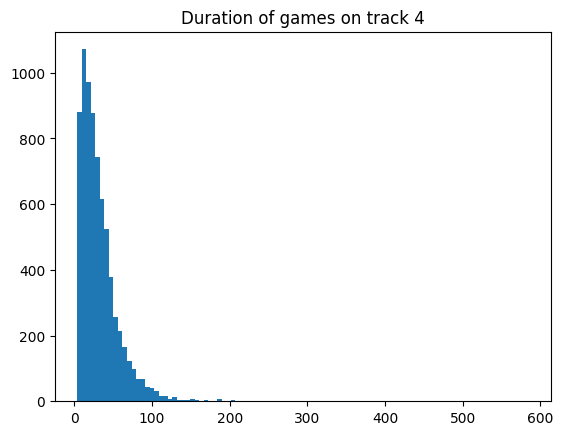

In [66]:
import matplotlib.pyplot as plt
plt.hist(durations, bins=100)
plt.title('Duration of games on track 4')
plt.show()

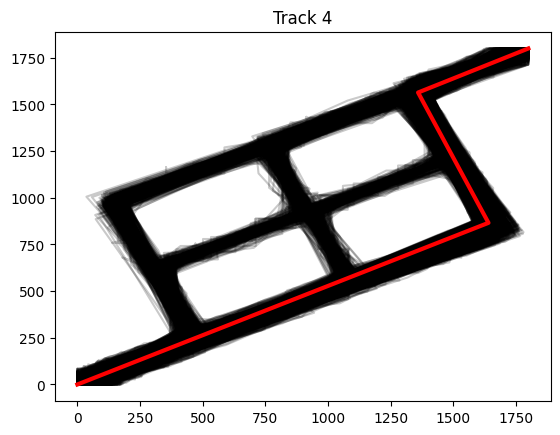

In [67]:
import matplotlib.pyplot as plt
import numpy as np

# Normalize durations: faster durations get higher alpha (darker), slower get lower alpha (lighter)
min_dur = min(durations)
max_dur = max(durations)
normalized_durations = [(max_dur - d) / (max_dur - min_dur) for d in durations]  # Invert scale

# Find the index of the fastest duration
fastest_index = durations.index(min_dur)

plt.figure()

# Plot all routes except the fastest first
for i, df in enumerate(games_on_track_4):
    if i == fastest_index:
        continue  # Skip the fastest for now
    
    df = df.iloc[1:]  # Start from second row
    alpha_value = normalized_durations[i] * 0.01 + 0.2  # Adjust range (0.2 to 0.6)
    plt.plot(df['Points_X'], df['Points_Y'], alpha=alpha_value, color='black')

# Now plot the fastest route on top in red
df_fastest = games_on_track_4[fastest_index].iloc[1:]
plt.plot(df_fastest['Points_X'], df_fastest['Points_Y'], alpha=1.0, color='red', linewidth=3)

plt.title('Track 4')
plt.show()


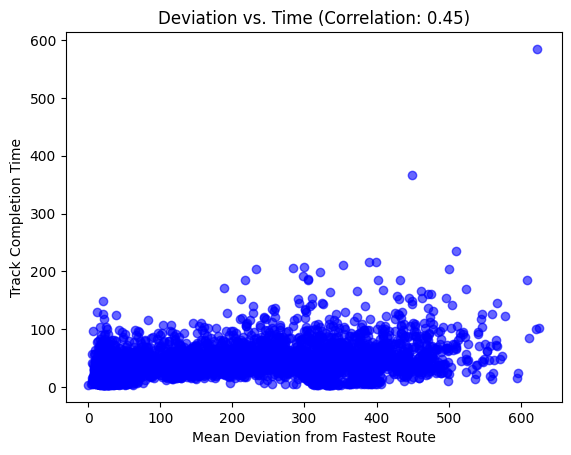

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from scipy.stats import spearmanr

# Get the fastest route (best trajectory)
fastest_index = durations.index(min(durations))
best_df = games_on_track_4[fastest_index].iloc[1:]
best_points = np.column_stack((best_df['Points_X'], best_df['Points_Y']))

deviations = []

for i, df in enumerate(games_on_track_4):
    if i == fastest_index:
        deviations.append(0)  # No deviation for the best route
        continue
    
    df = df.iloc[1:]
    other_points = np.column_stack((df['Points_X'], df['Points_Y']))
    
    # Compute mean closest distance (MPD)
    dists = cdist(other_points, best_points)  # Compute distances between all points
    min_dists = np.min(dists, axis=1)  # Find the closest point in best path for each point
    mean_deviation = np.mean(min_dists)  # Average deviation
    
    deviations.append(mean_deviation)

# Correlate deviation with time
correlation, p_value = spearmanr(deviations, durations)

# Plot deviation vs. time
plt.scatter(deviations, durations, c='blue', alpha=0.6)
plt.xlabel("Mean Deviation from Fastest Route")
plt.ylabel("Track Completion Time")
plt.title(f"Deviation vs. Time (Correlation: {correlation:.2f})")
plt.show()


In [18]:
import os
import pandas as pd
games_on_track_5 = []
for file in os.listdir('games'):
    print('games/' + file)
    try:
        df = pd.read_csv('games/' + file)
        if df['Track_ID'].iloc[0] == 5.0 and df['Completed.1'].iloc[0] == True:
            games_on_track_5.append(df)
    except:
        print('error')
        continue
    

games/20240422-0083_16:53:46:794.csv
games/20240317-0001_09:12:29:499.csv
games/20240515-0069_15:25:57:506.csv
games/20240830-0009_09:56:23:538.csv
games/20240105-0005_10:20:50:802.csv
games/20240527-0010_10:15:30:973.csv
games/20240120-0063_15:54:38:077.csv
games/20240217-0078_16:29:33:488.csv
games/20240209-0024_11:07:50:494.csv
games/20240303-0066_16:27:24:578.csv
games/20240119-0001_09:20:56:821.csv
games/20240128-0091_18:14:20:497.csv
games/20240411-0012_11:04:29:449.csv
games/20240119-0060_14:31:32:420.csv
games/20240831-0009_10:25:24:373.csv
games/20240613-0009_10:05:26:473.csv
games/20240510-0043_13:33:58:054.csv
games/20240213-0034_12:59:50:832.csv
games/20240325-0005_09:43:08:098.csv
games/20240414-0048_13:21:46:566.csv
games/20240418-0059_14:46:02:760.csv
games/20240128-0065_15:37:42:660.csv
games/20240224-0059_15:35:18:438.csv
games/20240504-0084_16:52:57:015.csv
games/20240428-0035_14:58:31:979.csv
games/20240601-0081_18:59:51:023.csv
games/20240824-0012_10:31:29:062.csv
g

In [19]:
from datetime import datetime
durations = []
for df in games_on_track_5:
    if not pd.isna(df['ClosingTime.1'].iloc[0]) and not pd.isna(df['StartTime.1'].iloc[0]):
        durations.append((datetime.strptime( str(df['ClosingTime.1'].iloc[0]), '%H:%M:%S:%f') - datetime.strptime( str(df['StartTime.1'].iloc[0]), '%H:%M:%S:%f')).total_seconds())


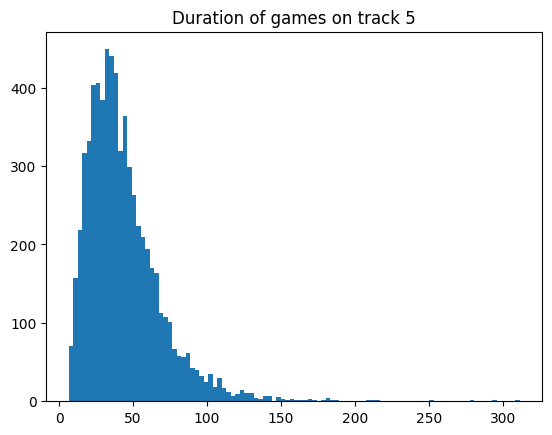

In [20]:
import matplotlib.pyplot as plt
plt.hist(durations, bins=100)
plt.title('Duration of games on track 5')
plt.show()

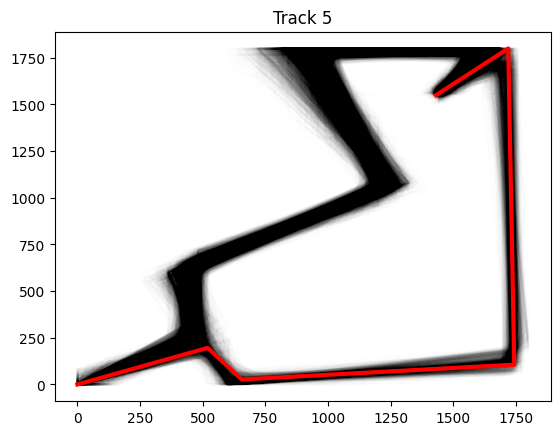

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Normalize durations: faster durations get higher alpha (darker), slower get lower alpha (lighter)
min_dur = min(durations)
max_dur = max(durations)
normalized_durations = [(max_dur - d) / (max_dur - min_dur) for d in durations]  # Invert scale

# Find the index of the fastest duration
fastest_index = durations.index(min_dur)

plt.figure()

# Plot all routes except the fastest first
for i, df in enumerate(games_on_track_5):
    if i == fastest_index:
        continue  # Skip the fastest for now
    
    df = df.iloc[1:]  # Start from second row
    alpha_value = normalized_durations[i] * 0.01 # Adjust range (0.2 to 0.6)
    plt.plot(df['Points_X'], df['Points_Y'], alpha=alpha_value, color='black')

# Now plot the fastest route on top in red
df_fastest = games_on_track_5[fastest_index].iloc[1:]
plt.plot(df_fastest['Points_X'], df_fastest['Points_Y'], alpha=1.0, color='red', linewidth=3)

plt.title('Track 5')
plt.show()


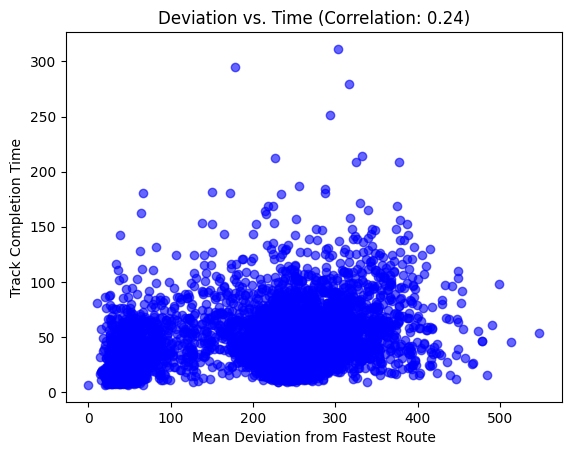

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from scipy.stats import spearmanr

# Get the fastest route (best trajectory)
fastest_index = durations.index(min(durations))
best_df = games_on_track_5[fastest_index].iloc[1:]
best_points = np.column_stack((best_df['Points_X'], best_df['Points_Y']))

deviations = []

for i, df in enumerate(games_on_track_5):
    if i == fastest_index:
        deviations.append(0)  # No deviation for the best route
        continue
    
    df = df.iloc[1:]
    other_points = np.column_stack((df['Points_X'], df['Points_Y']))
    
    # Compute mean closest distance (MPD)
    dists = cdist(other_points, best_points)  # Compute distances between all points
    min_dists = np.min(dists, axis=1)  # Find the closest point in best path for each point
    mean_deviation = np.mean(min_dists)  # Average deviation
    
    deviations.append(mean_deviation)

# Correlate deviation with time
correlation, p_value = spearmanr(deviations, durations)

# Plot deviation vs. time
plt.scatter(deviations, durations, c='blue', alpha=0.6)
plt.xlabel("Mean Deviation from Fastest Route")
plt.ylabel("Track Completion Time")
plt.title(f"Deviation vs. Time (Correlation: {correlation:.2f})")
plt.show()


In [23]:
# import os
# import pandas as pd
# games_on_track_7 = []
# for file in os.listdir('games'):
#     print('games/' + file)
#     try:
#         df = pd.read_csv('games/' + file)
#         if df['Track_ID'].iloc[0] == 7.0 and df['Completed.1'].iloc[0] == True:
#             games_on_track_7.append(df)
#     except:
#         print('error')
#         continue
    

In [51]:
from datetime import datetime
durations = []
for df in games_on_track_7:
    if not pd.isna(df['ClosingTime.1'].iloc[0]) and not pd.isna(df['StartTime.1'].iloc[0]):
        durations.append((datetime.strptime( str(df['ClosingTime.1'].iloc[0]), '%H:%M:%S:%f') - datetime.strptime( str(df['StartTime.1'].iloc[0]), '%H:%M:%S:%f')).total_seconds())


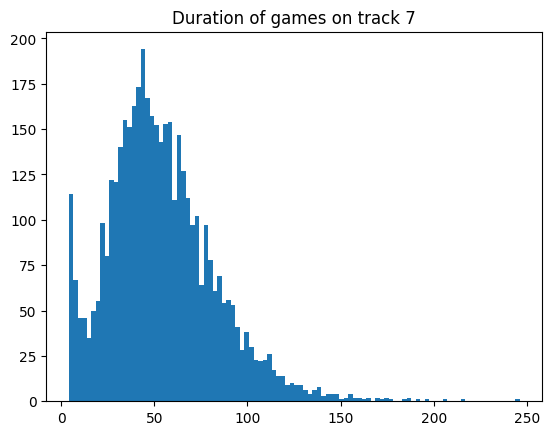

In [52]:
import matplotlib.pyplot as plt
plt.hist(durations, bins=100)
plt.title('Duration of games on track 7')
plt.show()

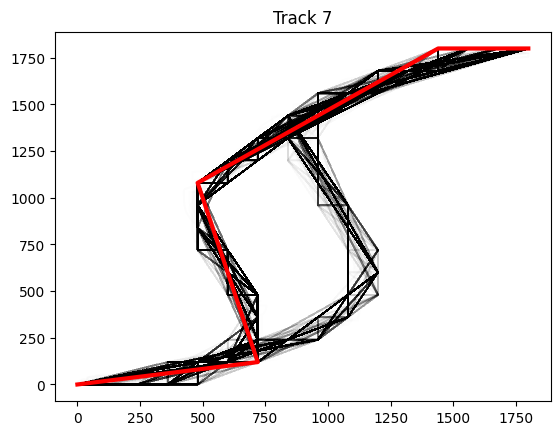

In [53]:
import matplotlib.pyplot as plt
import numpy as np

# Normalize durations: faster durations get higher alpha (darker), slower get lower alpha (lighter)
min_dur = min(durations)
max_dur = max(durations)
normalized_durations = [(max_dur - d) / (max_dur - min_dur) for d in durations]  # Invert scale

# Find the index of the fastest duration
fastest_index = durations.index(min_dur)

plt.figure()

# Plot all routes except the fastest first
for i, df in enumerate(games_on_track_7):
    if i == fastest_index:
        continue  # Skip the fastest for now
    
    df = df.iloc[1:]  # Start from second row
    alpha_value = normalized_durations[i] * 0.01 # Adjust range (0.2 to 0.6)
    plt.plot(df['Points_X'], df['Points_Y'], alpha=alpha_value, color='black')

# Now plot the fastest route on top in red
df_fastest = games_on_track_7[fastest_index].iloc[1:]
plt.plot(df_fastest['Points_X'], df_fastest['Points_Y'], alpha=1.0, color='red', linewidth=3)

plt.title('Track 7')
plt.show()


In [55]:
import os
dates = []
tracks = []
durations = []
completed = []
for file in os.listdir('games'):
    try:
        df = pd.read_csv('games/' + file)
        if not pd.isna(df['ClosingTime.1'].iloc[0]) and not pd.isna(df['StartTime.1'].iloc[0]) and df['Track_ID'].iloc[0] < 8.0:
            dates.append(df['Date'].iloc[0])
            tracks.append(df['Track_ID'].iloc[0])
            completed.append(df['Completed.1'].iloc[0])
        
            durations.append((datetime.strptime( str(df['ClosingTime.1'].iloc[0]), '%H:%M:%S:%f') - datetime.strptime( str(df['StartTime.1'].iloc[0]), '%H:%M:%S:%f')).total_seconds())
    except:
        continue

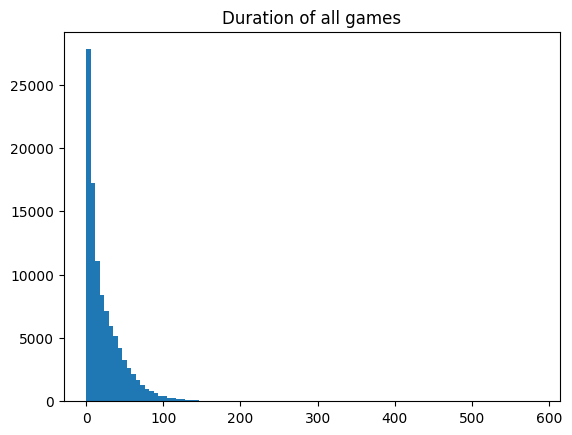

In [56]:
plt.hist(durations, bins=100)
plt.title('Duration of all games')
plt.show()

Text(0.5, 1.0, 'Track')

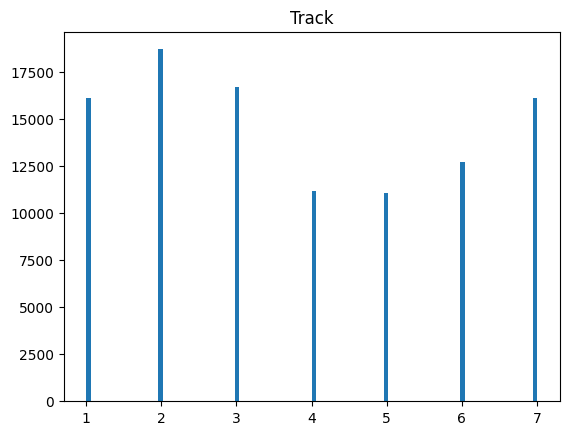

In [57]:
plt.hist(tracks, bins=100)
plt.title('Track')

In [58]:
data = pd.DataFrame({'Date': dates, 'Track': tracks, 'Duration': durations, 'Completed': completed})
data = data.groupby('Track').mean().reset_index()

Text(0.5, 1.0, 'Average duration per track')

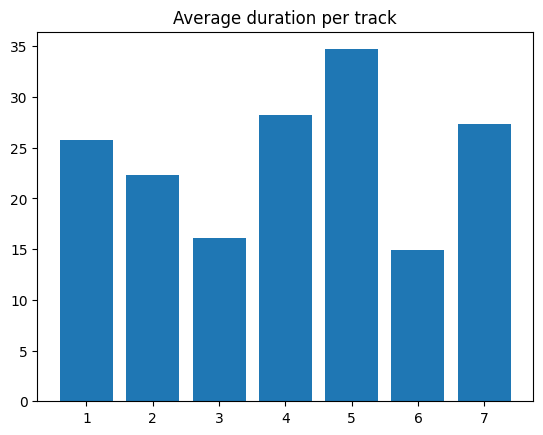

In [59]:
plt.bar(data['Track'], data['Duration'])
plt.title('Average duration per track')

Text(0.5, 1.0, 'Completion rate per track')

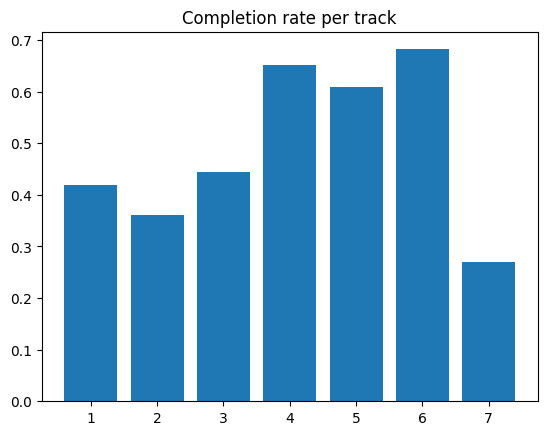

In [60]:
plt.bar(data.Track, data['Completed'])
plt.title('Completion rate per track')

In [8]:
import os
import csv

# Ścieżka do folderu z plikami
folder_path = "games"
output_file = "all_games.csv"

# Nagłówki kolumn
headers = [
    "ID", "Date", "Consent", "Team_Name", "Selected_Language", "Consent_Time_X_axis",
    "Age_X_axis", "Companionship_X_axis", "Question_Time_X_axis", "Consent_Time_Y_axis",
    "Age_Y_axis", "Companionship_Y_axis", "Question_Time_Y_axis", "StartTime", "ClosingTime",
    "Completed", "TerminationType", "Track_ID", "Difficulty_Level", "StartTime.1",
    "ClosingTime.1", "Time", "Mistake", "Completed.1"
]

# Tworzenie pliku i zapisanie nagłówków
with open(output_file, mode="w", newline="", encoding="utf-8") as outfile:
    writer = csv.writer(outfile)
    writer.writerow(headers)

    # Iterowanie przez pliki w folderze
    i=0
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)

        # Sprawdzanie, czy to plik CSV
        if filename.endswith(".csv") and os.path.isfile(file_path):
            with open(file_path, mode="r", newline="", encoding="utf-8") as infile:
                reader = csv.reader(infile)
                
                next(reader, None)  # Pominięcie pierwszego wiersza (nagłówków)
                second_row = next(reader, None)  # Pobranie drugiego wiersza

                if second_row:  # Jeśli drugi wiersz istnieje, zapisujemy go do pliku
                    writer.writerow(second_row[:24])
        i += 1
        print(i)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [16]:
all_games = pd.read_csv('all_games.csv')
all_games.head(200)

ID        Date  Consent Team_Name  Selected_Language  \
0    20240102-0000  20240102.0     True    BJ2 00                0.0   
1    20240102-0000  20240102.0     True    BJ2 00                0.0   
2    20240102-0000  20240102.0     True    BJ2 00                0.0   
3    20240102-0000  20240102.0     True    BJ2 00                0.0   
4    20240102-0000  20240102.0     True    BJ2 00                0.0   
..             ...         ...      ...       ...                ...   
195  20240102-0025  20240102.0     True    BJ2 25                1.0   
196  20240102-0026  20240102.0     True    BJ2 26                1.0   
197  20240102-0026  20240102.0     True    BJ2 26                1.0   
198  20240102-0027  20240102.0     True    BJ2 27                0.0   
199  20240102-0027  20240102.0     True    BJ2 27                0.0   

    Consent_Time_X_axis  Age_X_axis  Companionship_X_axis  \
0          09:30:48:500        25.0                   1.0   
1          09:30:48:500        25.0                   1.0   
2          09:30:48:500        25.0                   1.0   
3          09:30:48:500        25.0                   1.0   
4          09:30:48:500        25.0                   1.0   
..                  ...         ...                   ...   
195        11:59:49:092        18.0                   0.0   
196        12:02:09:867        14.0                   0.0   
197        12:02:09:867        14.0                   0.0   
198        12:05:27:747        31.0                   0.0   
199        12:05:27:747        31.0                   0.0   

    Question_Time_X_axis Consent_Time_Y_axis  ...   ClosingTime  Completed  \
0           09:30:55:925        09:30:27:247  ...  09:38:18:265       True   
1           09:30:55:925        09:30:27:247  ...  09:38:18:265       True   
2           09:30:55:925        09:30:27:247  ...  09:38:18:265       True   
3           09:30:55:925        09:30:27:247  ...  09:38:18:265       True   
4           09:30:55:925        09:30:27:247  ...  09:38:18:265       True   
..                   ...                 ...  ...           ...        ...   
195         11:59:57:785        12:00:03:690  ...  12:01:56:652      False   
196         12:02:17:423        12:02:06:262  ...  12:05:22:241      False   
197         12:02:17:423        12:02:06:262  ...  12:05:22:241      False   
198         12:05:37:373        12:05:34:721  ...  12:08:59:141       True   
199         12:05:37:373        12:05:34:721  ...  12:08:59:141       True   

    TerminationType Track_ID Difficulty_Level   StartTime.1  ClosingTime.1  \
0               2.0      2.0              0.0  09:31:04:583   09:31:49:178   
1               2.0      4.0              1.0  09:32:10:982   09:32:41:612   
2               2.0      4.0              1.0  09:32:48:653   09:32:49:922   
3               2.0      4.0              1.0  09:32:58:146   09:33:12:294   
4               2.0      6.0              2.0  09:33:24:189   09:33:29:228   
..              ...      ...              ...           ...            ...   
195             1.0      2.0              0.0  12:00:21:207            NaN   
196             1.0      1.0              0.0  12:02:24:731   12:04:09:435   
197             1.0      4.0              1.0  12:04:17:977   12:05:15:018   
198             0.0      1.0              0.0  12:05:54:356   12:06:30:692   
199             0.0      1.0              0.0  12:06:38:467   12:07:42:348   

         Time  Mistake Completed.1  
0     44594.0    False        True  
1     30630.0     True       False  
2      1267.0     True       False  
3     14147.0    False        True  
4      5038.0     True       False  
..        ...      ...         ...  
195       0.0    False       False  
196  104704.0    False        True  
197   57040.0    False        True  
198   36336.0     True       False  
199   63880.0    False        True  

[200 rows x 24 columns]

In [4]:
all_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104528 entries, 0 to 104527
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    104528 non-null  object 
 1   Date                  104528 non-null  float64
 2   Consent               104528 non-null  bool   
 3   Team_Name             104528 non-null  object 
 4   Selected_Language     104528 non-null  float64
 5   Consent_Time_X_axis   104528 non-null  object 
 6   Age_X_axis            104528 non-null  float64
 7   Companionship_X_axis  104528 non-null  float64
 8   Question_Time_X_axis  104528 non-null  object 
 9   Consent_Time_Y_axis   104528 non-null  object 
 10  Age_Y_axis            104528 non-null  float64
 11  Companionship_Y_axis  104528 non-null  float64
 12  Question_Time_Y_axis  104528 non-null  object 
 13  StartTime             104528 non-null  object 
 14  ClosingTime           104528 non-null  object 
 15  

In [5]:
all_games['Date'] = all_games['Date'].astype(int).astype(str)
all_games['Date'] = pd.to_datetime(all_games['Date'], format='%Y%m%d') 

In [6]:
all_games['Date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 104528 entries, 0 to 104527
Series name: Date
Non-Null Count   Dtype         
--------------   -----         
104528 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 816.8 KB


In [7]:
all_games['Date'].unique()

<DatetimeArray>
['2024-01-02 00:00:00', '2024-01-03 00:00:00', '2024-01-04 00:00:00',
 '2024-01-05 00:00:00', '2024-01-06 00:00:00', '2024-01-07 00:00:00',
 '2024-01-09 00:00:00', '2024-01-10 00:00:00', '2024-01-11 00:00:00',
 '2024-01-12 00:00:00',
 ...
 '2024-12-19 00:00:00', '2024-12-20 00:00:00', '2024-12-21 00:00:00',
 '2024-12-22 00:00:00', '2024-12-23 00:00:00', '2024-12-27 00:00:00',
 '2024-12-28 00:00:00', '2024-12-29 00:00:00', '2024-12-30 00:00:00',
 '2024-12-31 00:00:00']
Length: 216, dtype: datetime64[ns]

In [8]:
print(all_games['Date'].min())
print(all_games['Date'].max())

2024-01-02 00:00:00
2024-12-31 00:00:00


In [11]:
all_games['Date'].nunique()

216

In [17]:
print(all_games['Team_Name'])

0         BJ2 00
1         BJ2 00
2         BJ2 00
3         BJ2 00
4         BJ2 00
           ...  
104523    BDV 48
104524    BDV 48
104525    BDV 48
104526    BDV 48
104527    BDV 48
Name: Team_Name, Length: 104528, dtype: object


In [13]:
all_games.nunique()

ID                       12731
Date                       216
Consent                      1
Team_Name                12731
Selected_Language            2
Consent_Time_X_axis      12728
Age_X_axis                 101
Companionship_X_axis         4
Question_Time_X_axis     12728
Consent_Time_Y_axis      12731
Age_Y_axis                 101
Companionship_Y_axis         4
Question_Time_Y_axis     12730
StartTime                12731
ClosingTime              12728
Completed                    2
TerminationType              3
Track_ID                    15
Difficulty_Level             4
StartTime.1             104360
ClosingTime.1           102836
Time                     10478
Mistake                      2
Completed.1                  2
dtype: int64

In [18]:
# ile jest wierszy dla różnych wartości w kolumnie 'Track_ID'

all_games['Track_ID'].value_counts()


Track_ID
2.0     18854
3.0     16798
7.0     16546
1.0     16261
6.0     12940
4.0     11371
5.0     11301
10.0      121
8.0       102
9.0        87
11.0       63
12.0       48
13.0       33
14.0        2
23.0        1
Name: count, dtype: int64

In [24]:
# wybierz wiersze kóre mają Track_ID z wartości 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 23.0

tracks = [8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 23.0]
selected_games = all_games[all_games['Track_ID'].isin(tracks)]
# z selected_games wybierz kolumny 'Date', 'Question_Time_X_axis', 'Track_ID' i wyświetl 15 pierwszych wierszy

selected_games[['Date', 'Question_Time_X_axis', 'Track_ID']].head(15)

Date Question_Time_X_axis  Track_ID
26558  20240214.0         02:12:01:649       8.0
30307  20240219.0         20:16:04:846       8.0
30309  20240219.0         20:24:04:453       8.0
30310  20240219.0         20:26:01:796       8.0
30311  20240219.0         22:16:52:240       8.0
30312  20240219.0         22:17:55:239       8.0
30313  20240219.0         22:17:55:239       8.0
30316  20240219.0         22:17:55:239       8.0
30317  20240219.0         22:17:55:239       8.0
30318  20240219.0         22:17:55:239       8.0
30319  20240219.0         22:22:42:955       8.0
30320  20240219.0         22:22:42:955       8.0
30321  20240219.0         22:23:14:416       8.0
30322  20240219.0         22:23:34:086       8.0
30323  20240219.0         22:23:34:086       8.0